In [1]:
import warnings
warnings.filterwarnings('ignore')

import contextily as cx
import geopandas as gpd
from ipywidgets import interact
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import os
import rioxarray as rxr

### Co and REE Mineral Occurrences

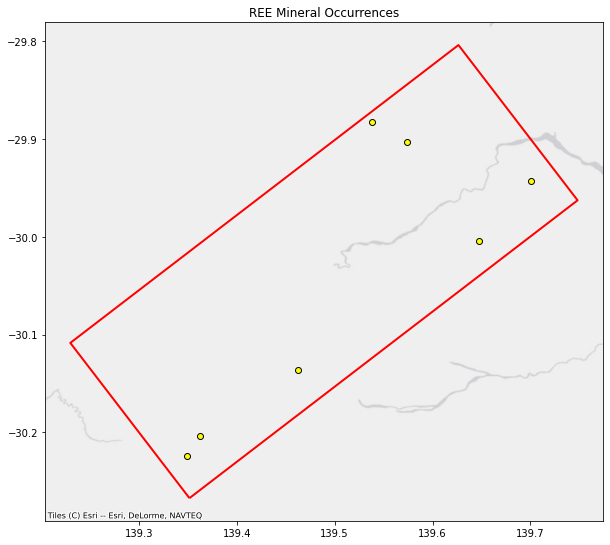

In [2]:
min_occ = gpd.read_file('./Datasets/GIS/ree.shp')
frame = gpd.read_file('./Datasets/GIS/frame.shp')

bounds = frame.bounds
extent = [bounds.loc[0]['minx'], bounds.loc[0]['maxx'], bounds.loc[0]['miny'], bounds.loc[0]['maxy']]

fig, ax = plt.subplots(figsize=(10, 10))
min_occ.plot(ax=ax, edgecolor='black', color='yellow')
frame.plot(ax=ax, edgecolor='red', color='none', linewidth=2)
cx.add_basemap(ax, crs='EPSG:4283', source=cx.providers.Esri.WorldGrayCanvas)
ax.set_title('REE Mineral Occurrences')
plt.show()

### Faults

In [3]:
fault_files = [
    './Datasets/Faults/Archean_Early_Mesoproterozoic_Faults.shp',
    './Datasets/Faults/Neoproterozoic_Ordovician_Faults.shp'
]

@interact(dataset=fault_files)
def show_dist(dataset):
    data = gpd.read_file(dataset)
    fig, ax = plt.subplots(figsize=(10, 10))
    data.plot(ax=ax, edgecolor='none', color='blue', linewidth=1)
    frame.plot(ax=ax, edgecolor='red', color='none', linewidth=2)
    min_occ.plot(ax=ax, edgecolor='black', color='yellow')
    cx.add_basemap(ax, crs='EPSG:4283', source=cx.providers.Esri.WorldGrayCanvas)
    ax.set_title('Faults')
    plt.show()

interactive(children=(Dropdown(description='dataset', options=('./Datasets/Faults/Archean_Early_Mesoproterozoi…

### Formations

In [4]:
formation_files = [
    './Datasets/Formations/Archaean_Early_Mesoproterozoic_Polygons.shp',
    './Datasets/Formations/Neoproterozoic_Ordovician_Polygons.shp'
]

@interact(dataset=formation_files)
def show_dist(dataset):
    data = gpd.read_file(dataset)
    fig, ax = plt.subplots(figsize=(10, 10))
    data.plot(ax=ax, edgecolor='white', color='blue', linewidth=1)
    frame.plot(ax=ax, edgecolor='red', color='none', linewidth=2)
    min_occ.plot(ax=ax, edgecolor='black', color='yellow')
    cx.add_basemap(ax, crs='EPSG:4283', source=cx.providers.Esri.WorldGrayCanvas)
    ax.set_title('Formations')
    plt.show()

interactive(children=(Dropdown(description='dataset', options=('./Datasets/Formations/Archaean_Early_Mesoprote…

### Geology

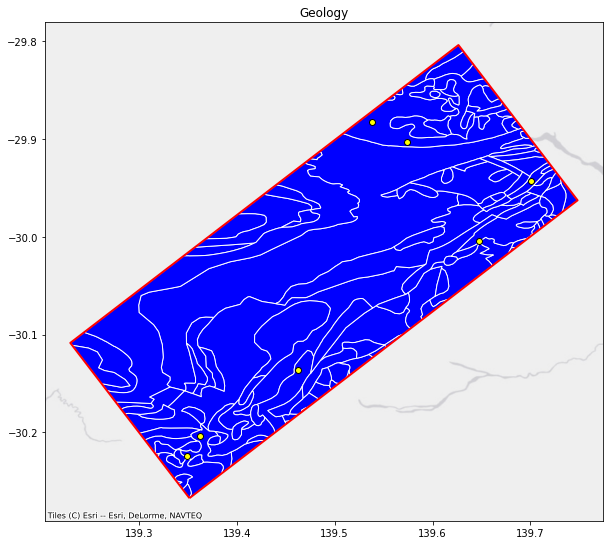

In [5]:
geology_file = './Datasets/Geology/2M_Surface_Geology.shp'
data = gpd.read_file(geology_file)
fig, ax = plt.subplots(figsize=(10, 10))
data.plot(ax=ax, edgecolor='white', color='blue', linewidth=1)
frame.plot(ax=ax, edgecolor='red', color='none', linewidth=2)
min_occ.plot(ax=ax, edgecolor='black', color='yellow')
cx.add_basemap(ax, crs='EPSG:4283', source=cx.providers.Esri.WorldGrayCanvas)
ax.set_title('Geology')
plt.show()

### Magnetics

In [6]:
magnetic_files = [
    './Datasets/Magnetics/SA_TMI_GDA94.tif',
    './Datasets/Magnetics/SA_TMI_VRTP_1VD_GDA94.tif',
    './Datasets/Magnetics/SA_TMI_VRTP_AGC_GDA94.tif',
    './Datasets/Magnetics/SA_TMI_VRTP_AS_GDA94.tif',
    './Datasets/Magnetics/SA_TMI_VRTP_BigE_GDA94.tif',
    './Datasets/Magnetics/SA_TMI_VRTP_BigT_GDA94.tif',
    './Datasets/Magnetics/SA_TMI_VRTP_CAUCHY_3rd_GDA94.tif',
    './Datasets/Magnetics/SA_TMI_VRTP_GDA94.tif',
    './Datasets/Magnetics/SA_TMI_VRTP_PsuedoGrav_GDA94.tif',
    './Datasets/Magnetics/SA_TMI_VRTP_Tilt_GDA94.tif',
    './Datasets/Magnetics/SA_TMI_VRTP_TZ_GDA94.tif',
    './Datasets/Magnetics/SA_TMI_VRTP_Tzz_GDA94.tif'
]

@interact(file=magnetic_files)
def show_dist(file):
    raster = rxr.open_rasterio(file, masked=True).squeeze()
    
    # reproject if required
    if raster.rio.crs.to_epsg() != frame.crs.to_epsg():
        raster = raster.rio.reproject(frame.crs)
    
    raster_array = raster.values

    v_mean = np.nanmean(raster_array)
    v_std = np.nanstd(raster_array)

    fig, ax = plt.subplots(figsize=(10, 10))
    frame.plot(ax=ax, edgecolor='red', color='none', linewidth=2)
    cx.add_basemap(ax, crs='EPSG:4283', source=cx.providers.Esri.WorldGrayCanvas)
    cb = ax.imshow(raster_array, cmap='Spectral_r', extent=extent, vmin=v_mean-v_std, vmax=v_mean+v_std)
    divider = make_axes_locatable(ax)
    cax = divider.new_vertical(size='5%', pad=0.5, pack_start=True)
    fig.add_axes(cax)
    filename = os.path.splitext(os.path.basename(file))[0]
    plt.colorbar(cb, orientation='horizontal', label=filename, cax=cax)
    plt.show()

interactive(children=(Dropdown(description='file', options=('./Datasets/Magnetics/SA_TMI_GDA94.tif', './Datase…

### Gravity

In [7]:
gravity_files = [
    './Datasets/Gravity/SA_GRAV_1VD_ONSHORE_GDA94.tif',
    './Datasets/Gravity/SA_GRAV_ONSHORE_GDA94.tif',
    './Datasets/Gravity/SA_GRAV_UC1000_RESIDUAL_ONSHORE_GDA94.tif'
]

@interact(file=gravity_files)
def show_dist(file):
    raster = rxr.open_rasterio(file, masked=True).squeeze()
    
    # reproject if required
    if raster.rio.crs.to_epsg() != frame.crs.to_epsg():
        raster = raster.rio.reproject(frame.crs)
    
    raster_array = raster.values

    v_mean = np.nanmean(raster_array)
    v_std = np.nanstd(raster_array)

    fig, ax = plt.subplots(figsize=(10, 10))
    frame.plot(ax=ax, edgecolor='red', color='none', linewidth=2)
    cx.add_basemap(ax, crs='EPSG:4283', source=cx.providers.Esri.WorldGrayCanvas)
    cb = ax.imshow(raster_array, cmap='Spectral_r', extent=extent, vmin=v_mean-v_std, vmax=v_mean+v_std)
    divider = make_axes_locatable(ax)
    cax = divider.new_vertical(size='5%', pad=0.5, pack_start=True)
    fig.add_axes(cax)
    filename = os.path.splitext(os.path.basename(file))[0]
    plt.colorbar(cb, orientation='horizontal', label=filename, cax=cax)
    plt.show()

interactive(children=(Dropdown(description='file', options=('./Datasets/Gravity/SA_GRAV_1VD_ONSHORE_GDA94.tif'…

### Radiometrics

In [8]:
radiometric_files = [
    './Datasets/Radiometrics/SA_RAD_DOSE.tif',     # Radiation dose rate
    './Datasets/Radiometrics/SA_RAD_K.tif',           # K concentration
    './Datasets/Radiometrics/SA_RAD_TH.tif',         # Th concentration
    './Datasets/Radiometrics/SA_RAD_U.tif'            # U concentration
]

@interact(file=radiometric_files)
def show_dist(file):
    raster = rxr.open_rasterio(file, masked=True).squeeze()
    
    # reproject if required
    if raster.rio.crs.to_epsg() != frame.crs.to_epsg():
        raster = raster.rio.reproject(frame.crs)
    
    raster_array = raster.values

    v_mean = np.nanmean(raster_array)
    v_std = np.nanstd(raster_array)

    fig, ax = plt.subplots(figsize=(10, 10))
    frame.plot(ax=ax, edgecolor='red', color='none', linewidth=2)
    cx.add_basemap(ax, crs='EPSG:4283', source=cx.providers.Esri.WorldGrayCanvas)
    cb = ax.imshow(raster_array, cmap='Spectral_r', extent=extent, vmin=v_mean-v_std, vmax=v_mean+v_std)
    divider = make_axes_locatable(ax)
    cax = divider.new_vertical(size='5%', pad=0.5, pack_start=True)
    fig.add_axes(cax)
    filename = os.path.splitext(os.path.basename(file))[0]
    plt.colorbar(cb, orientation='horizontal', label=filename, cax=cax)
    plt.show()

interactive(children=(Dropdown(description='file', options=('./Datasets/Radiometrics/SA_RAD_DOSE.tif', './Data…

### Remote Sensing

In [9]:
remote_sensing_files = [
    './Datasets/Remote Sensing/AlOH_Group_Composition.tif',
    './Datasets/Remote Sensing/AlOH_Group_Content.tif',
    './Datasets/Remote Sensing/FeOH_Group_Content.tif',
    './Datasets/Remote Sensing/Ferric_Oxide_Composition.tif',
    './Datasets/Remote Sensing/Ferric_Oxide_Content.tif',
    './Datasets/Remote Sensing/Ferrous_Iron_Content_in_MgOH.tif',
    './Datasets/Remote Sensing/Ferrous_Iron_Index.tif',
    './Datasets/Remote Sensing/Green_Vegetation.tif',
    './Datasets/Remote Sensing/Gypsum_Index.tif',
    './Datasets/Remote Sensing/Kaolin_Group_Index.tif',
    './Datasets/Remote Sensing/MgOH_Group_Composition.tif',
    './Datasets/Remote Sensing/MgOH_Group_Content.tif',
    './Datasets/Remote Sensing/Opaque_Index.tif',
    './Datasets/Remote Sensing/Quartz_Index.tif',
    './Datasets/Remote Sensing/Silica_Index.tif'
]

@interact(file=remote_sensing_files)
def show_dist(file):
    raster = rxr.open_rasterio(file, masked=True).squeeze()
    
    # reproject if required
    if raster.rio.crs.to_epsg() != frame.crs.to_epsg():
        raster = raster.rio.reproject(frame.crs)
    
    raster_array = raster.values

    v_mean = np.nanmean(raster_array)
    v_std = np.nanstd(raster_array)

    fig, ax = plt.subplots(figsize=(10, 10))
    frame.plot(ax=ax, edgecolor='red', color='none', linewidth=2)
    cx.add_basemap(ax, crs='EPSG:4283', source=cx.providers.Esri.WorldGrayCanvas)
    cb = ax.imshow(raster_array, cmap='Spectral_r', extent=extent, vmin=v_mean-v_std, vmax=v_mean+v_std)
    divider = make_axes_locatable(ax)
    cax = divider.new_vertical(size='5%', pad=0.5, pack_start=True)
    fig.add_axes(cax)
    filename = os.path.splitext(os.path.basename(file))[0]
    plt.colorbar(cb, orientation='horizontal', label=filename, cax=cax)
    plt.show()

interactive(children=(Dropdown(description='file', options=('./Datasets/Remote Sensing/AlOH_Group_Composition.…

### DEM

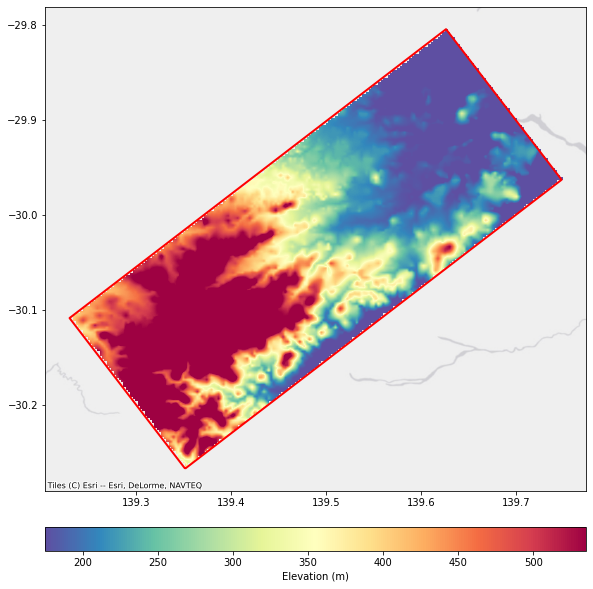

In [10]:
dem_file = './Datasets/DEM/dem-9s.tif'

raster = rxr.open_rasterio(dem_file, masked=True).squeeze()

# reproject if required
if raster.rio.crs.to_epsg() != frame.crs.to_epsg():
    raster = raster.rio.reproject(frame.crs)

raster_array = raster.values

v_mean = np.nanmean(raster_array)
v_std = np.nanstd(raster_array)

fig, ax = plt.subplots(figsize=(10, 10))
frame.plot(ax=ax, edgecolor='red', color='none', linewidth=2)
cx.add_basemap(ax, crs='EPSG:4283', source=cx.providers.Esri.WorldGrayCanvas)
cb = ax.imshow(raster_array, cmap='Spectral_r', extent=extent, vmin=v_mean-v_std, vmax=v_mean+v_std)
divider = make_axes_locatable(ax)
cax = divider.new_vertical(size='5%', pad=0.5, pack_start=True)
fig.add_axes(cax)
plt.colorbar(cb, orientation='horizontal', label='Elevation (m)', cax=cax)
plt.show()